In [1]:
%load_ext autoreload
%autoreload 2

import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import h5py
import imageio
import matplotlib
import gc
import sys
import io
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from scipy.optimize import curve_fit
import scipy.integrate


# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM
plt.rcParams.update({'font.size': 14})  

tidy3dAPI = os.environ["API_TIDY3D_KEY"]
plt.rc('font', family='Arial')


In [2]:
file = rf"H:\phd stuff\tidy3d\output\LSU Data\transmission_different_permmitivities_thickness.h5"
with h5py.File(file, 'r') as h5f:
    data = {
            'transmission_right':h5f["transmission_right"][:],
            'name':h5f["name"],
            'nu(a/lambda)':h5f["nu(a/lambda)"][:],
            "freqs":h5f["raw_freqs(Hz)"][:],
            "sizes":h5f["sizes"][:],
            "cell_size":h5f["cell_size"],
            "a":h5f["a"],
            "eps":h5f["eps"][:]
                        
            }

In [3]:
a=2.58
dir_plot = Path(rf"H:\phd stuff\tidy3d\output\LSU Data\ThicknessEpsVariations")
dir_plot.mkdir(parents=True,exist_ok=True)
colors = plt.cm.gist_rainbow(np.linspace(0, 1, len(data["sizes"])))
for i,eps in enumerate(data["eps"]):
    plt.figure(figsize=(20, 10))
    for j,size in enumerate(data["sizes"]):
        plt.plot(td.C_0/data["freqs"],data["transmission_right"][i,j,:],label=rf"L_{size*14.3/a : .4f}a",color=colors[j])
        plt.legend()
        plt.yscale("log")

    plt.xlabel(rf"$\lambda$")
    plt.ylabel("Transmission")
    plt.grid(True,which="both")
    plt.title(f"eps_{eps}")
    plt.savefig(rf"{dir_plot}\eps_{eps}.pdf")    
    plt.close()

In [4]:
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
from scipy.ndimage import gaussian_filter1d
min_transmission = []
lambda_gaps = []

for i,eps in enumerate(data["eps"]):
    min_eps = []
    gap_eps = []
    for j,size in enumerate(data["sizes"]):
        # plt.figure(figsize=(20, 10))
        y=data["transmission_right"][i,j,:]
        y_smooth = gaussian_filter1d(y, sigma=2)
        f_interp = interp1d(td.C_0/data["freqs"], y_smooth, kind='cubic')  # 'cubic' or 'quadratic' for smooth curves
        x_fine = np.linspace((td.C_0/data["freqs"]).min(), (td.C_0/data["freqs"]).max(), 1000)
        y_fine = f_interp(x_fine)
        local_minima_indices = argrelextrema(y_fine, np.less,order=10)[0]
        min_eps.append(np.min(y_fine[local_minima_indices]))
        gap_eps.append((x_fine[local_minima_indices])[np.argmin(y_fine[local_minima_indices])])
        # plt.plot(a/(td.C_0/data["freqs"]), data["transmission_right"][i,j,:] , 'o', label='Original points')
        # plt.plot(a/x_fine, y_fine, '-', label='Interpolated curve')
        # plt.plot(a/x_fine[local_minima_indices], y_fine[local_minima_indices], 'rx', label='Local Minima')
        # plt.xlabel(r'$a/ \lambda$')
        # plt.ylabel(r'Transmission')
        # plt.title(f'Normalized Radial Autocorrelation a={a:.2f}')
        # plt.yscale("log")
        # plt.grid(True,which="both")
        # plt.legend()
        # dir_plot = Path(rf"H:\phd stuff\tidy3d\output\LSU Data\Interpolation\n_rod_{np.sqrt(eps):.2f}")
        # dir_plot.mkdir(parents=True,exist_ok=True)
        # plt.savefig(rf"{dir_plot}\{rf"L_{size*14.3/a:.4f}a"}.pdf")
        # plt.close()
    min_transmission.append(min_eps)
    lambda_gaps.append(gap_eps)

min_transmission=np.array(min_transmission)
lambda_gaps=np.array(lambda_gaps)

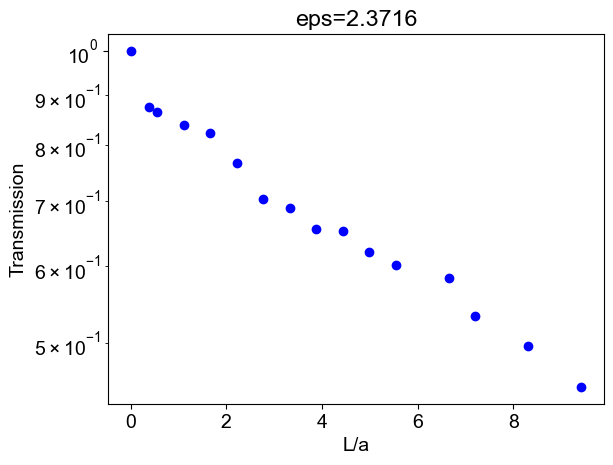

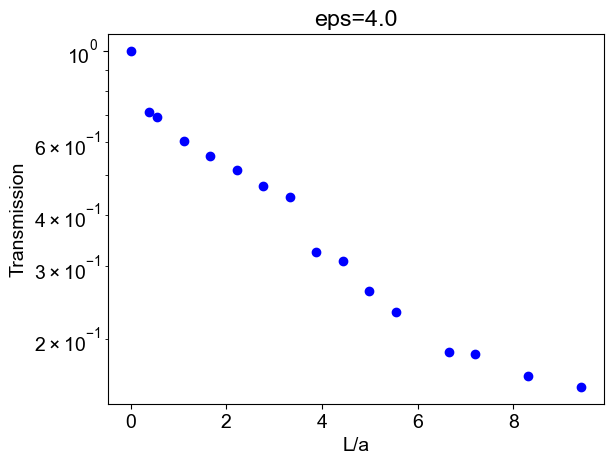

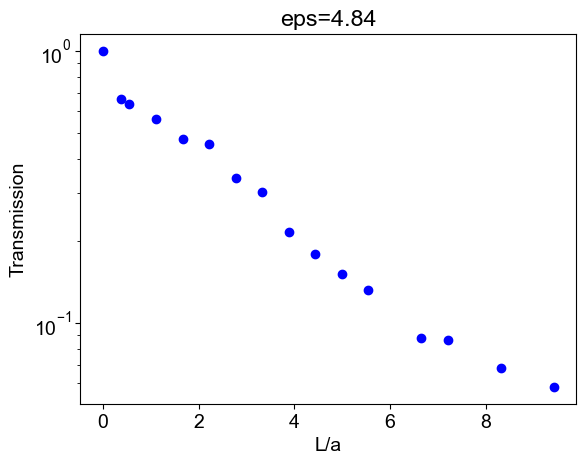

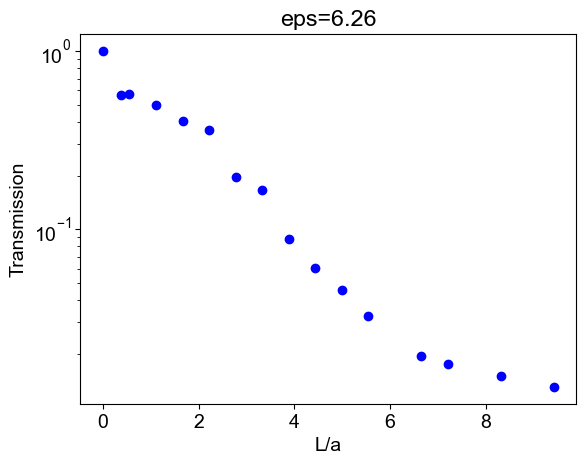

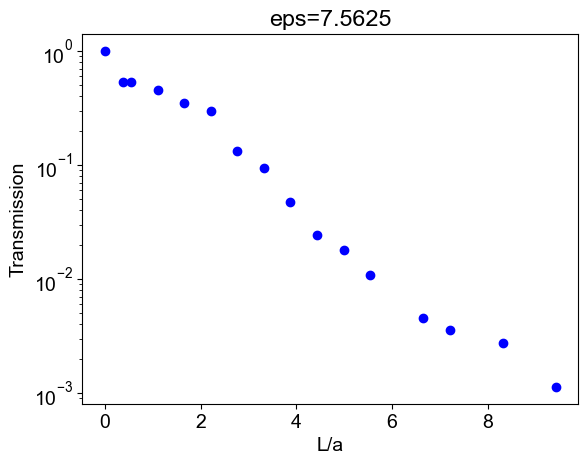

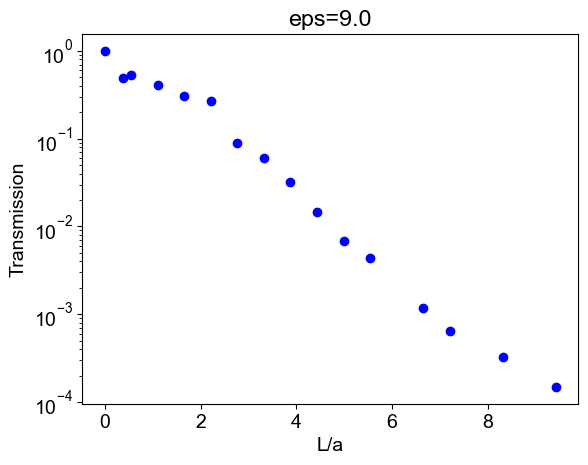

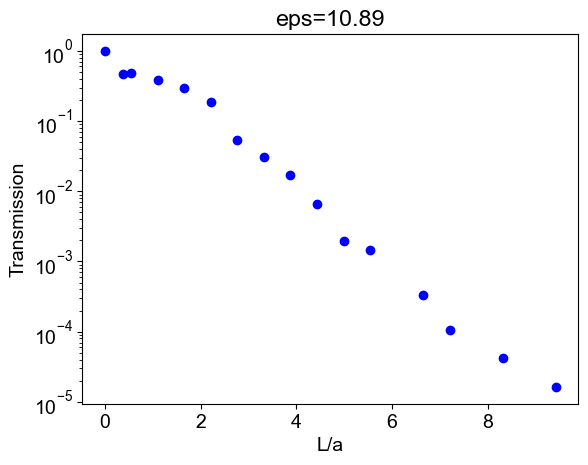

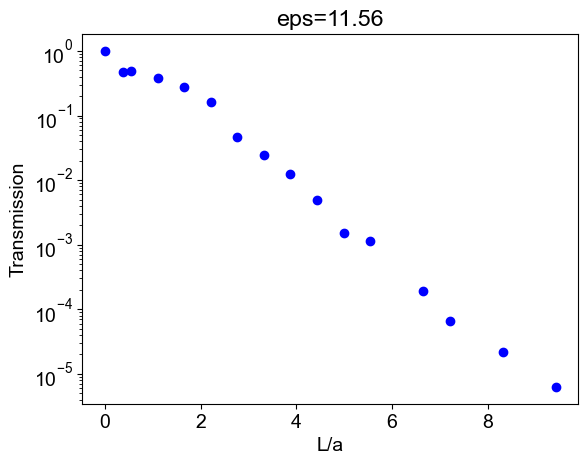

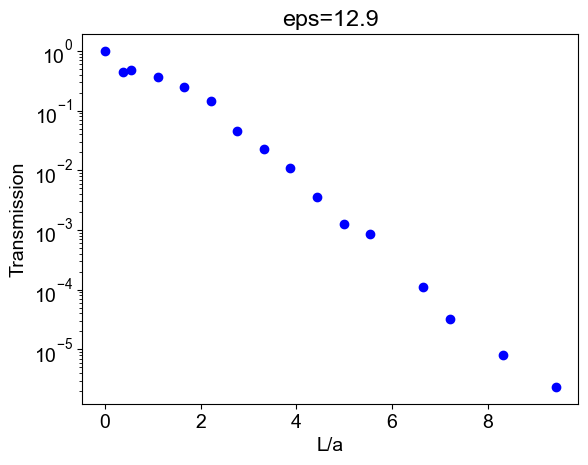

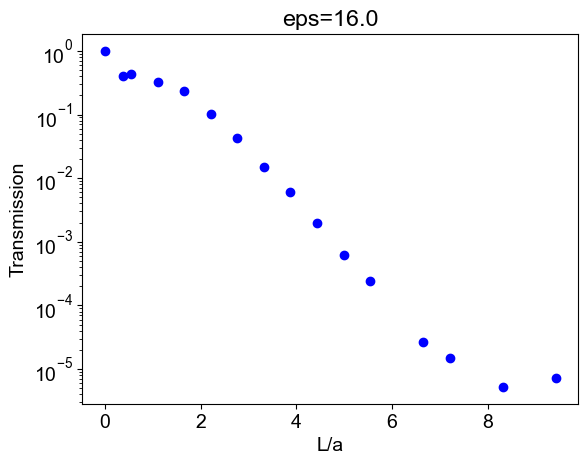

In [5]:
for i in range(min_transmission.shape[0]):  # Loop over the first axis (10)
    for j in range(min_transmission.shape[1]):  # Loop over second axis (16)
        item = min_transmission[i, j]  # Extract scalar index
        plt.scatter(14.3*data["sizes"][j]/a, item, color="b")  
        plt.title(rf"eps={data['eps'][i]}")
        plt.xlabel("L/a")
        plt.ylabel("Transmission")
        plt.yscale("log")
        
    plt.show()  


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0008611910161562264 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0008611910161562264 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. cr

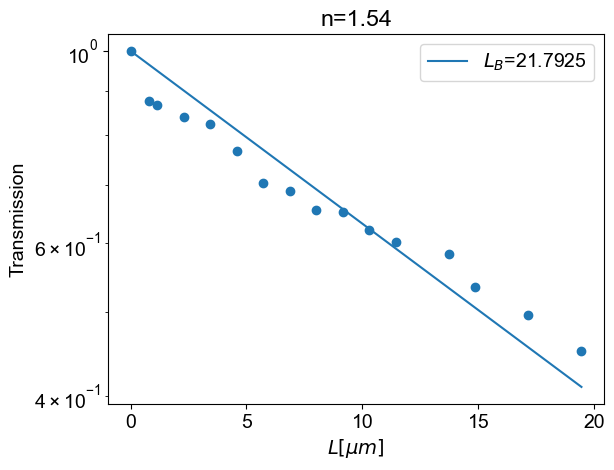

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 2.7838101232191548e-05 Stepsize:1.0  Decrease Error:0.0  Curvature Error:2.7838101232191548e-05 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 


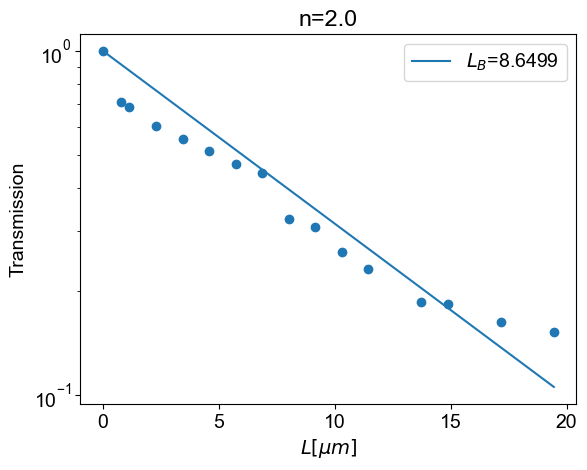

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0003209135902579874 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0003209135902579874 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.04520111903548241 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.04520111903548241 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.5429310202598572  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.8143965005874634  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 


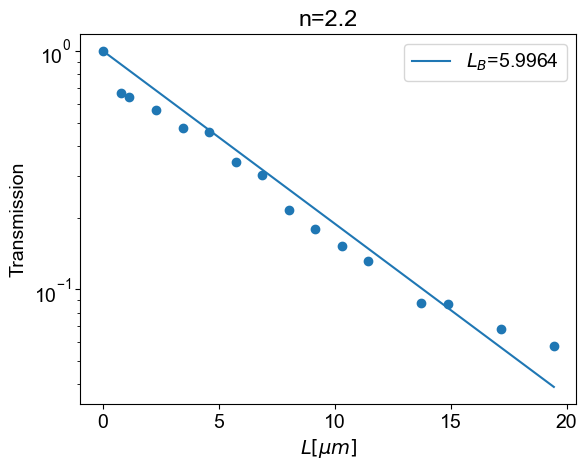

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.41418761014938354 Stepsize:1.0  Decrease Error:0.06431734561920166  Curvature Error:0.41418761014938354 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.41780683398246765  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.6267102360725403  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.9400653839111328  Decrease Error:0.0  Curvature Error:0.0 


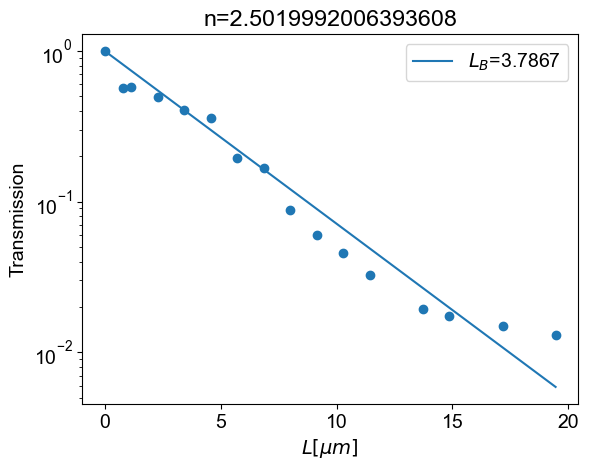

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 2.3774702548980713 Stepsize:1.0  Decrease Error:0.6577193140983582  Curvature Error:2.3774702548980713 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.24379801750183105  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.3656970262527466  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.5485455393791199  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.8228182792663574  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 


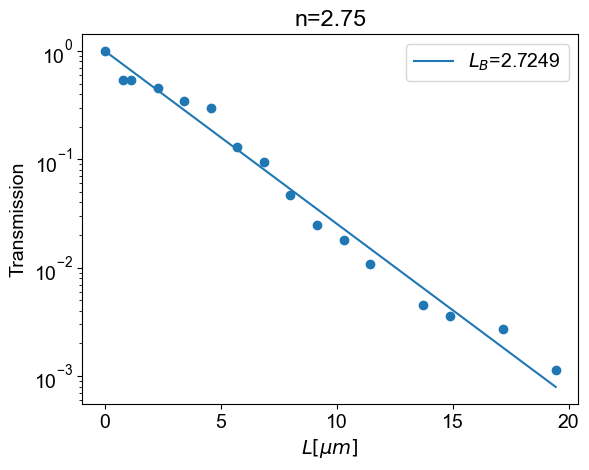

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 1120652.5 Stepsize:1.0  Decrease Error:15967.857421875  Curvature Error:1120652.5 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 59.455963134765625 Stepsize:0.5  Decrease Error:3.3677661418914795  Curvature Error:59.455963134765625 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.3329526484012604  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.49942898750305176  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.7491434812545776  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INF

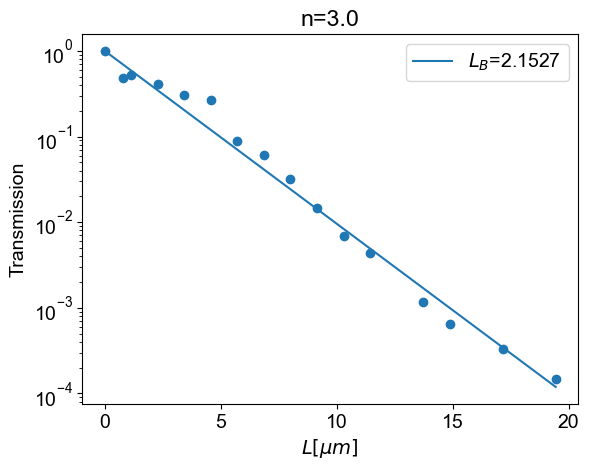

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 138.6801300048828 Stepsize:1.0  Decrease Error:90.58770751953125  Curvature Error:138.6801300048828 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 2.0742764472961426 Stepsize:0.12876293063163757  Decrease Error:0.0  Curvature Error:2.0742764472961426 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 222.34901428222656 Stepsize:0.3273967504501343  Decrease Error:2.6838700771331787  Curvature Error:222.34901428222656 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.17099252343177795  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 47.9627685546875 Stepsize:0.2564888000488281  Decrease Error:2.6337523460388184  Curvature Error:47.9627685546875 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum 

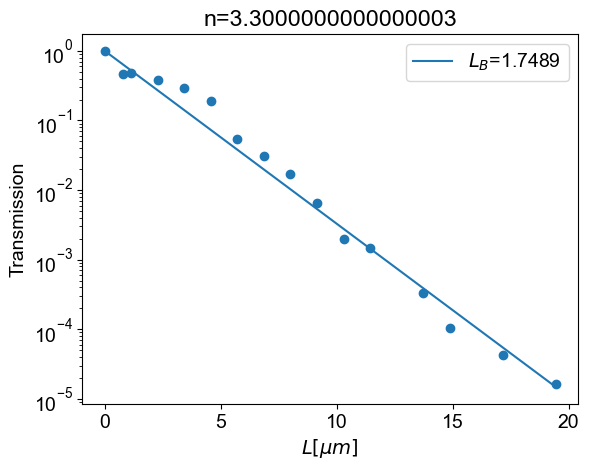

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 77.11913299560547 Stepsize:1.0  Decrease Error:77.11913299560547  Curvature Error:64.64425659179688 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.17569540441036224  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 56.67003631591797 Stepsize:0.26354309916496277  Decrease Error:3.701976776123047  Curvature Error:56.67003631591797 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.0561412014067173  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.0842118039727211  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.1263177096843719

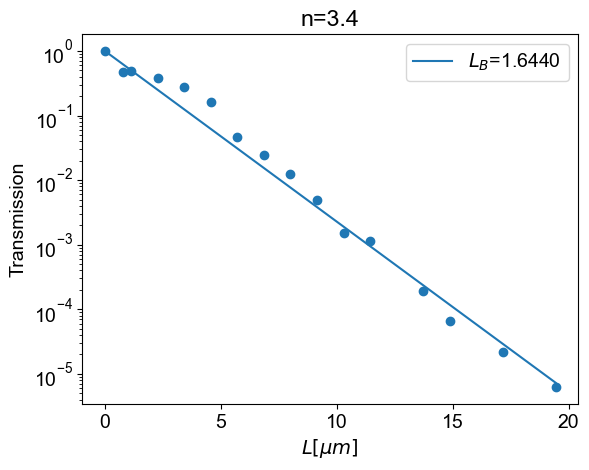

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 70.45106506347656 Stepsize:1.0  Decrease Error:70.45106506347656  Curvature Error:20.42725944519043 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 18.86543846130371 Stepsize:0.219656303524971  Decrease Error:0.0  Curvature Error:18.86543846130371 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 4.878924369812012 Stepsize:0.14593929052352905  Decrease Error:0.0  Curvature Error:4.878924369812012 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.19223684072494507  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.1761673539876938 Stepsize:0.2883552610874176  Decrease Error:0.016315415501594543  Curvature Error:0.1761673539876938 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Cur

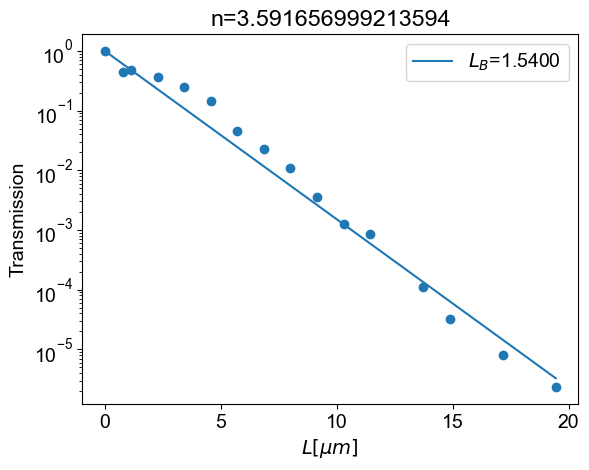

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 67.96324920654297 Stepsize:1.0  Decrease Error:67.96324920654297  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 662.4759521484375 Stepsize:0.2495153695344925  Decrease Error:1.7332909107208252  Curvature Error:662.4759521484375 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 21.098230361938477 Stepsize:0.10618043690919876  Decrease Error:0.0  Curvature Error:21.098230361938477 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.15928921103477478  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 91473.9609375 Stepsize:0.23893381655216217  Decrease Error:1442.0614013671875  Curvature Error:91473.9609375 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature 

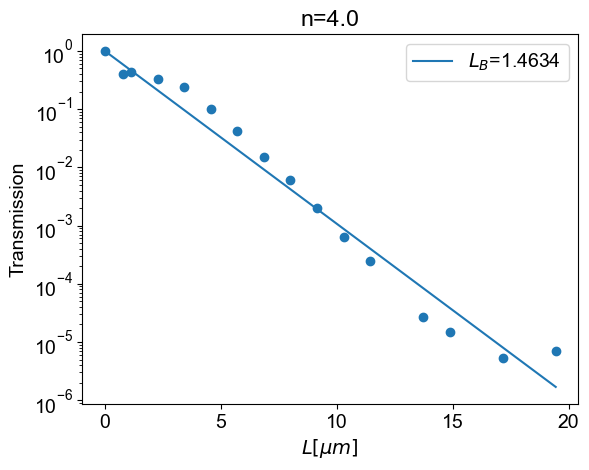

In [6]:
import jax
import jax.numpy as jnp
import jaxopt
def fit_decay(x,m):
    return (-(x/m))
sizes = data["sizes"]*14.3*0.8
LB_values = []
for i,item in enumerate(min_transmission):
    #Fit Optimal decay
    model = lambda params,x: fit_decay(x,params[0])
    def loss_fn(params):
        y_pred = model(params, sizes[1:])
        return jnp.mean((y_pred - jnp.log(item[1:]))**2)
    
    initial_params = jnp.array([3], dtype=jnp.float32)
    optimizer = jaxopt.BFGS(fun=loss_fn,maxiter=15000)
    # Optimize the parameters
    result = optimizer.run(initial_params)
    m = (result.params)[0]


    ##plot 
    plt.scatter(sizes,item)
    plt.plot(sizes,np.exp(fit_decay(sizes,m)), label=rf"$L_B$={(m):.4f}")
    LB_values.append(m)
    plt.title(rf"n={np.sqrt(data["eps"][i])}")
    plt.xlabel(rf"$L[\mu m]$")
    plt.ylabel("Transmission")
    plt.yscale("log")
    plt.legend()
    plt.show()

LB_values=np.array(LB_values)

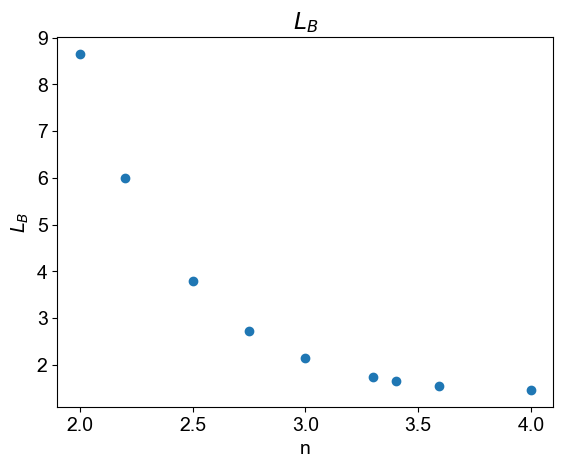

In [7]:
plt.scatter(np.sqrt(data["eps"])[1:],LB_values[1:])
plt.title(rf"$L_B$")
plt.xlabel("n")
plt.ylabel("$L_B$")
plt.show()

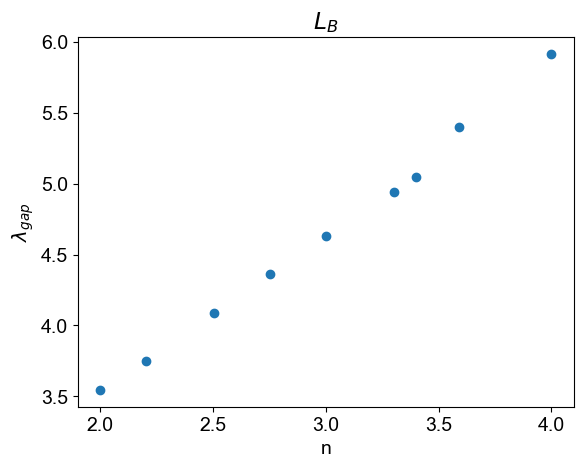

In [47]:
plt.scatter(np.sqrt(data["eps"])[1:],0.9*0.8*(lambda_gaps[1:,11]))
plt.title(rf"$L_B$")
plt.xlabel(rf"n")
plt.ylabel(r"$\lambda_{gap}$")
plt.show()

In [9]:
# data_txt = np.column_stack((np.sqrt(data["eps"]),LB_values))

In [10]:
# np.savetxt(rf"H:\phd stuff\tidy3d\output\LSU Data\txtData\L_B_Analysis.txt", 
#            data_txt, fmt="%.18f", delimiter=" ", header="index_n L_B", comments="")


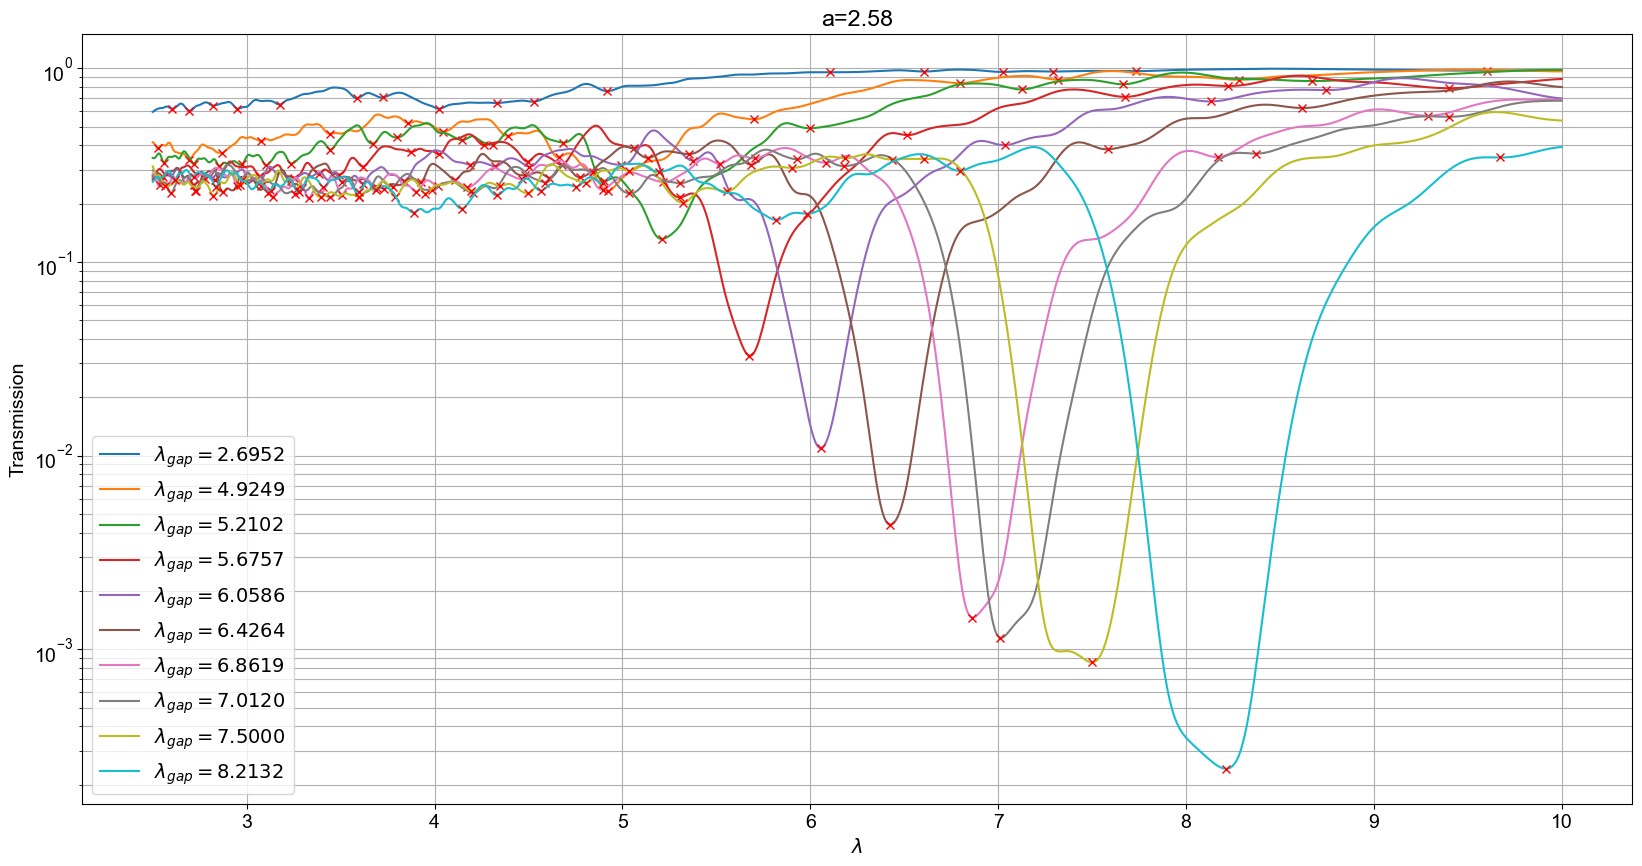

In [43]:
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
from scipy.ndimage import gaussian_filter1d

plt.figure(figsize=(20, 10))
for i,eps in enumerate(data["eps"]):
    for j,size in enumerate(data["sizes"]):
        if size ==1:
            y=data["transmission_right"][i,j,:]
            y_smooth = gaussian_filter1d(y, sigma=2)
            f_interp = interp1d(td.C_0/data["freqs"], y_smooth, kind='cubic')  # 'cubic' or 'quadratic' for smooth curves
            x_fine = np.linspace((td.C_0/data["freqs"]).min(), (td.C_0/data["freqs"]).max(), 1000)
            y_fine = f_interp(x_fine)
            local_minima_indices = argrelextrema(y_fine, np.less,order=10)[0]
            min_eps=(np.min(y_fine[local_minima_indices]))
            gap_eps=(x_fine[local_minima_indices])[np.argmin(y_fine[local_minima_indices])]
            plt.plot(x_fine, y_fine, '-',label=rf'$\lambda_{{gap}}={gap_eps:.4f}$')
            plt.plot(x_fine[local_minima_indices], y_fine[local_minima_indices], 'rx')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'Transmission')
plt.title(f'a={a:.2f}')
plt.yscale("log")
plt.grid(True,which="both")
plt.legend()
plt.show()
